<a href="https://colab.research.google.com/github/Gaurav1401/IMD_evaluation/blob/main/IMD_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import warnings as wg
wg.filterwarnings("ignore")

import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy import fftpack

### **Generate a random linked list of n nodes, whose property is defined in such a way that the value of every node is a perfect square less than k^3 for any number k<=n.**

In [25]:
class Node:
  def __init__(self, info, link = None):
    self.info = info
    self.link = link

In [26]:
class LinkedList:
  def __init__(self):
    self.head = None


  def insert_at_end(self, n, k):
    if k <= n and n>=1:
      i = 0
      x = random.randint(0, n)
      if x**2 < k**3:
        self.head = Node(x**2)
        num = 1 #1 node has been created
        while num < n:
          x = random.randint(0,n)
          if x**2 < k**3: 
            current = self.head
            while current.link != None:
              current = current.link
            current.link = Node(x**2)
            num += 1
          else:
            x = random.randint(0,n)
      else:
        x = random.randint(0,n)

    else:
      print("Enter correct values")

  def display(self):
      current = self.head
      while current != None:
          print(current.info, end = " ")
          current = current.link

Time Complexity :- O(n^2)<br>
Space Complexity :- O(1)

In [27]:
ll = LinkedList()

ll.insert_at_end(10,5)
ll.display()

4 4 16 9 100 4 0 49 16 81 

### **Write a function/ method to print a mirror image of a binary tree in a recursive manner considering the input parameter to be root node.**

In [28]:
class Node:
  def __init__(self,info):
    self.left = None
    self.info = info
    self.right = None

In [29]:
class BST:
  def buildBST(self, root, ele):
    if root == None:
      return Node(ele)

    if ele < root.info:
      root.left = self.buildBST(root.left, ele)
    else:
      root.right = self.buildBST(root.right, ele)

    return root

  def mirror(self, root):
    if root == None:
      return

    temp = root
    self.mirror(root.left)
    self.mirror(root.right)

    temp = root.left
    root.left = root.right
    root.right = temp

  
  def inorder(self, root):
    if root == None:
      return

    self.inorder(root.left)
    print(root.info)
    self.inorder(root.right)

root = None
b = BST()
for ele in [10, 5, 25, 2, 7, 30]:
    root = b.buildBST(root, ele)

b.inorder(root)
b.mirror(root)
print()
b.inorder(root)

2
5
7
10
25
30

30
25
10
7
5
2


Time Complexity:- O(n)<br>
Space Complexity:- O(1)

### **Linear Regression**
Consider the following series of 2 parameters x and y<br>
     X: 0,1,3,5,6,4,2,1,-1,-5,9,7,11,12,13<br>
     Y: 1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33

Find the linear regression equation for y and x considering x as an independent parameter. Calculate error and bias parts in the regression relation.

In [30]:

x = np.array([0,1,3,5,6,4,2,1,-1,-5,9,7,11,12,13])
y = np.array([1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33])

x = x.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

[1.4284695]
5.790938280413843


**Equation of line is given by:** $$ y\ =\ 1.43x\ +\ 5.79$$

In [31]:
def RMSE(y_true, y_predict):
  return np.sqrt(mean_squared_error(y_true, y_predict))

**Bias is defined as the average difference between predicted values and true values**

In [32]:
mean_absolute_error(y, model.predict(x))

5.672351052443811

### **Primary Wavelength**

Consider the following time-series recorded at continuous time-stamps/ units<br>
X: 1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33

Find the maximum repetition interval in time units i.e. primary wavelength.

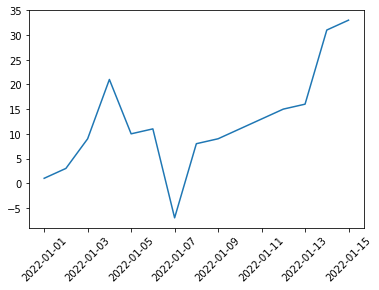

In [33]:
series = [1,3,9,21,10,11,-7,8,9,11,13,15,16,31,33]

timeseries = np.arange("2022-01-01", "2022-01-16", dtype = "datetime64[D]")
plt.plot(timeseries, series)
plt.xticks(rotation = 45)
plt.show()

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

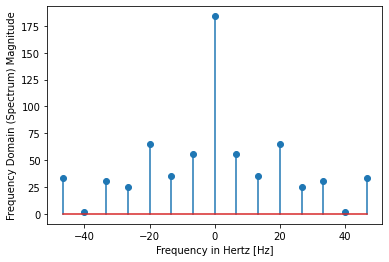

In [34]:
f_s = 100
X = fftpack.fft(series)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
plt.show()

In [35]:
w = np.fft.fft(series)
print(np.absolute(w))

[184.          55.84954695  35.53646919  65.17690166  25.22211482
  30.8058436    1.99285959  33.35914247  33.35914247   1.99285959
  30.8058436   25.22211482  65.17690166  35.53646919  55.84954695]


**Leaving the fist value, the largest value is at index 3, hence the signal repeats itself 3 times, Hence the length of the signal -- the period -- would be 15/3 = 5.**

In [36]:
np.fft.fftfreq(15)

array([ 0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667, -0.46666667, -0.4       ,
       -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667])

**The frequency at index 3 is 1/5, i.e. the frequency for one time unit is 1/5, meaning the signal takes five time units for a full period.**